# M05_exploring_scikitlearn_multiclass_regressor
A notebook that explores the options for predicting values for the entirety of the samples of data collected for the sentiment paper, using my labelled data (n=1000 for each state) as training data. This is for the actual sentiment score, not the addressee of a given tweet.

NL, 20/07/20

In [39]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from mord import LogisticAT

In [9]:
wines_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [20]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26b80908>]],
      dtype=object)

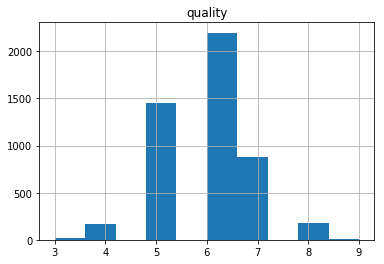

In [19]:
wines_df.hist(column = 'quality')

### Models

In [23]:
# instantiate models
model_linear = LinearRegression()
model_1vR = LogisticRegression(multi_class='ovr',
    class_weight='balanced')
model_multi = LogisticRegression(multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced')
model_ordinal = LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation

In [25]:
# divide df into features matrix and target vector
features = wines_df.iloc[:, :-1]  #all except quality
target = wines_df['quality']

MAE = make_scorer(mean_absolute_error)
folds = 5

In [34]:
print('Mean absolute error:' )
MAE_linear = cross_val_score(model_linear,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Linear regression: ', np.mean(MAE_linear))
MAE_1vR = cross_val_score(model_1vR,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Logistic regression (one versus rest): ', np.mean(MAE_1vR))
MAE_multi = cross_val_score(model_multi,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Logistic regression (multinomial): ', np.mean(MAE_multi))
MAE_ordinal = cross_val_score(model_ordinal,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Ordered logistic regression: ', np.mean(MAE_ordinal))

Mean absolute error:
Linear regression:  0.5937976390149554


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic regression (one versus rest):  0.8818490814648218


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic regression (multinomial):  1.6912050915561436
Ordered logistic regression:  0.5477621896562506


In [30]:
MAE_linear

array([0.65151403, 0.60287265, 0.58660583, 0.57607985, 0.55191584])

In [40]:
def acc_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return accuracy_score(target_true, target_fit)

acc = make_scorer(acc_fun)
folds = 5

In [41]:
print('Accuracy:' )
acc_linear = cross_val_score(model_linear,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Linear regression: ', np.mean(acc_linear))
acc_1vR = cross_val_score(model_1vR,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Logistic regression (one versus rest): ', np.mean(acc_1vR))
acc_multi = cross_val_score(model_multi,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Logistic regression (multinomial): ', np.mean(acc_multi))
acc_ordinal = cross_val_score(model_ordinal,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Ordered logistic regression: ', np.mean(acc_ordinal))

Accuracy:
Linear regression:  0.5065412436680494


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic regression (one versus rest):  0.4063305164470245


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic regression (multinomial):  0.17129729286134823
Ordered logistic regression:  0.5118509099247461


In [42]:
model_linear.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
target

0       6
1       6
2       6
3       6
4       6
5       6
6       6
7       6
8       6
9       6
10      5
11      5
12      5
13      7
14      5
15      7
16      6
17      8
18      6
19      5
20      8
21      7
22      8
23      5
24      6
25      6
26      6
27      6
28      6
29      7
       ..
4868    6
4869    6
4870    7
4871    6
4872    5
4873    6
4874    6
4875    6
4876    7
4877    5
4878    4
4879    6
4880    6
4881    6
4882    5
4883    6
4884    5
4885    6
4886    7
4887    7
4888    5
4889    6
4890    6
4891    6
4892    5
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64